In [25]:
import pandas as pd
import numpy as np
import json
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder


pd.reset_option('max_colwidth')

nltk.download('words')  
nltk.download('punkt')  

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Sherow\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sherow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df = pd.read_excel(r'c:\matproje\matsiklar (1).xlsx')

In [27]:
counts = df['Babanizin meslegi nedir? (Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin)'].value_counts()
counts

a       40
e       31
d       30
c       28
e, a     1
Name: Babanizin meslegi nedir? (Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin), dtype: int64

Effects of Haaving an Engineering Family Member


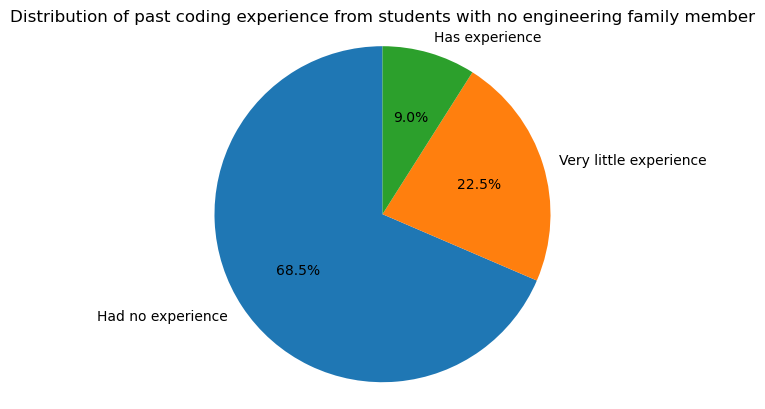

In [28]:

df['universiteye girmeden önce kodlama deneyimleriniz oldu mu?'] = df['universiteye girmeden önce kodlama deneyimleriniz oldu mu?'].replace({'a': 'Had no experience', 'b': 'Very little experience', 'c': 'Has experience'})

filtered_data = df[df['Aile uyelerinizden hicbiri muhendislik alanında egitim aliyor mu?'] == 'b']

counts = filtered_data['universiteye girmeden önce kodlama deneyimleriniz oldu mu?'].value_counts()

# Plot the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of past coding experience from students with no engineering family member')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


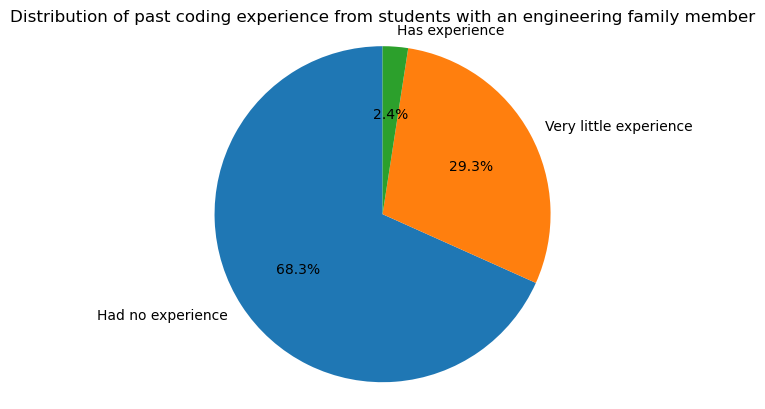

In [29]:

df['universiteye girmeden önce kodlama deneyimleriniz oldu mu?'] = df['universiteye girmeden önce kodlama deneyimleriniz oldu mu?'].replace({'a': 'Had no experience', 'b': 'Very little experience', 'c': 'Has experience'})


filtered_data = df[df['Aile uyelerinizden hicbiri muhendislik alanında egitim aliyor mu?'] == 'a']

counts = filtered_data['universiteye girmeden önce kodlama deneyimleriniz oldu mu?'].value_counts()

# Plot the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of past coding experience from students with an engineering family member')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [30]:

df['universiteye girmeden önce kodlama deneyimleriniz oldu mu?'] = df['universiteye girmeden önce kodlama deneyimleriniz oldu mu?'].replace({'a': 'Had no experience', 'b': 'Very little experience', 'c': 'Has experience'})


contingency_table = pd.crosstab(df['Aile uyelerinizden hicbiri muhendislik alanında egitim aliyor mu?'], df['universiteye girmeden önce kodlama deneyimleriniz oldu mu?'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-square statistic: 2.2662888161516386
P-value: 0.3220191033331856
Degrees of freedom: 2
Expected frequencies:
[[28.06923077  2.83846154 10.09230769]
 [60.93076923  6.16153846 21.90769231]]


In [31]:
contingency_table

universiteye girmeden önce kodlama deneyimleriniz oldu mu?,Had no experience,Has experience,Very little experience
Aile uyelerinizden hicbiri muhendislik alanında egitim aliyor mu?,,,
a,28,1,12
b,61,8,20


Contribution of Mathematics Engineering to Personal and Professional Development

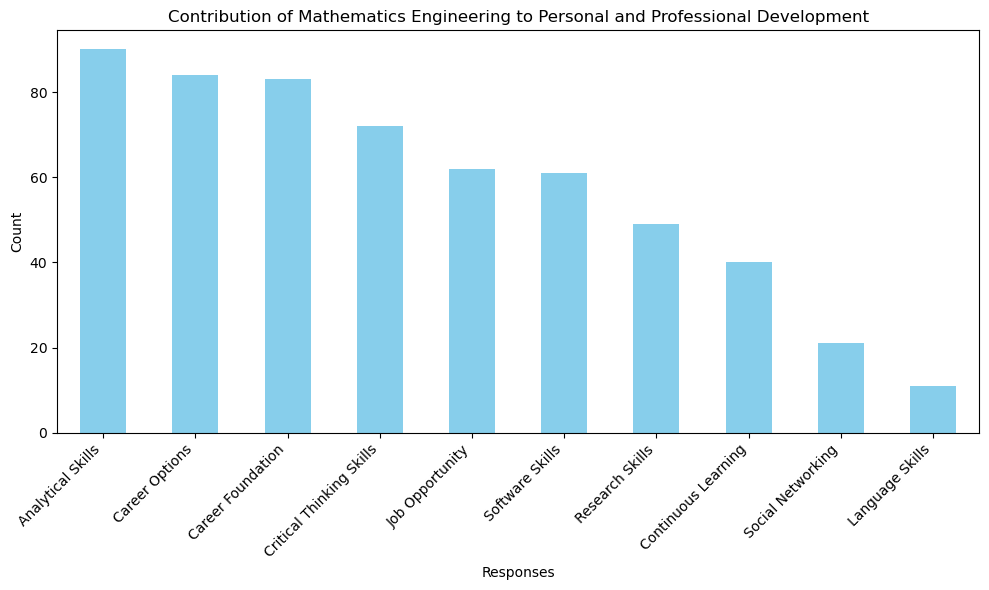

In [32]:
response_mapping = {
    'a': 'Job Opportunity',
    'b': 'Career Foundation',
    'c': 'Critical Thinking Skills',
    'd': 'Analytical Skills',
    'e': 'Language Skills',
    'f': 'Career Options',
    'g': 'Software Skills',
    'h': 'Research Skills',
    'i': 'Social Networking',
    'j': 'Continuous Learning',
    'k': 'Analytical Skills'
}
responses = df['Matematik Muhendisligi\'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?'].str.split(',').explode().str.strip()

responses = responses[responses != '']

responses = responses.map(response_mapping)
answer_counts = responses.value_counts()

# Create bar chart
plt.figure(figsize=(10, 6))
answer_counts.plot(kind='bar', color='skyblue')
plt.title("Contribution of Mathematics Engineering to Personal and Professional Development")
plt.xlabel("Responses")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Contribution of Mathematics Engineering to Personal and Professional Development and When choosing a department, what is the most important factor that makes mathematical engineering stand out compared to other departments? corr.

In [33]:
df['Matematik Muhendisligi\'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?'] = df['Matematik Muhendisligi\'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?'].str.split(',')



In [34]:
df['Matematik Muhendisligi\'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?']

0                                       [a]
1                                   [b,  a]
2                              [c, e, g, d]
3                       [f,  a,  e,  i,  h]
4                   [b,  c,  f,  a,  g,  d]
                       ...                 
125    [b,  j,  f,  a,   d,  h,  i,  e,  g]
126                     [e,  g,  i,  h,  g]
127             [b,  j,  c,  f,  g,  d,  h]
128                            [f,  a,  g ]
129                         [b,  j,  c,  a]
Name: Matematik Muhendisligi'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?, Length: 130, dtype: object

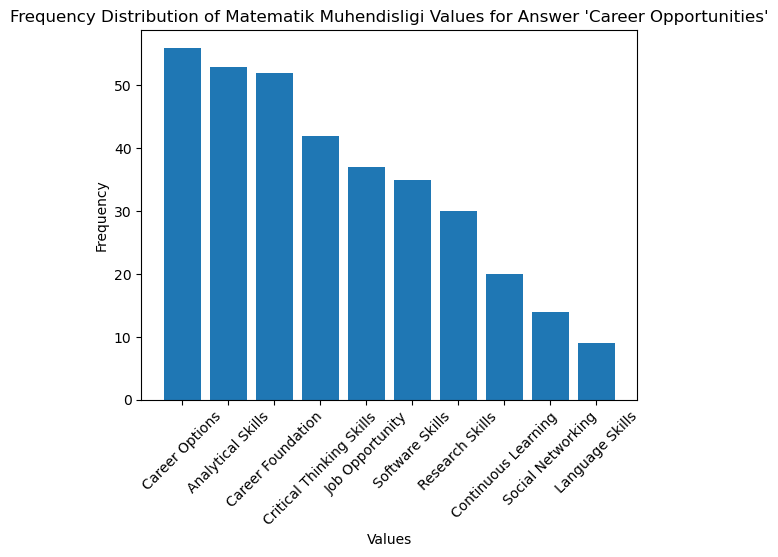

In [35]:
response_mapping = {
    'a': 'Job Opportunity',
    'b': 'Career Foundation',
    'c': 'Critical Thinking Skills',
    'd': 'Analytical Skills',
    'e': 'Language Skills',
    'f': 'Career Options',
    'g': 'Software Skills',
    'h': 'Research Skills',
    'i': 'Social Networking',
    'j': 'Continuous Learning',
    'k': 'Analytical Skills'
}



# Filter rows where 'Bolum secerken' is 'a'
filtered_df = df[df["Bolum secerken, matematik muhendisligini diger bolumlere gore on plana cikaran en onemli faktor nedir?"] == 'a']

# Flatten the arrays in 'Matematik Muhendisligi' column, strip whitespace, and remove empty strings
flattened_values = [item.strip() for sublist in filtered_df["Matematik Muhendisligi'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?"] for item in sublist if item.strip()]

# Map values to their corresponding descriptions
mapped_values = [response_mapping[val] for val in flattened_values]

# Count the frequency of each value
value_counts = pd.Series(mapped_values).value_counts()

# Plot the frequency distribution
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Matematik Muhendisligi Values for Answer 'Career Opportunities'")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

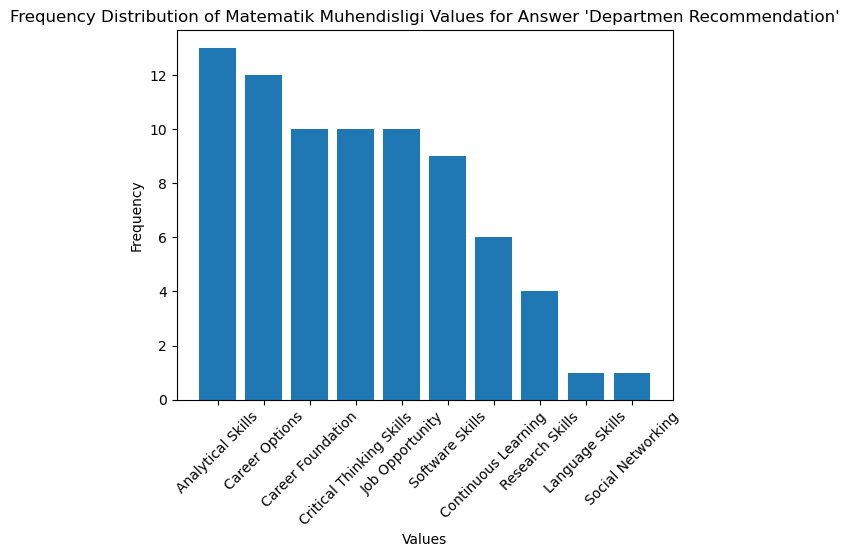

In [36]:
response_mapping = {
    'a': 'Job Opportunity',
    'b': 'Career Foundation',
    'c': 'Critical Thinking Skills',
    'd': 'Analytical Skills',
    'e': 'Language Skills',
    'f': 'Career Options',
    'g': 'Software Skills',
    'h': 'Research Skills',
    'i': 'Social Networking',
    'j': 'Continuous Learning',
    'k': 'Analytical Skills'
}



# Filter rows where 'Bolum secerken' is 'a'
filtered_df = df[df["Bolum secerken, matematik muhendisligini diger bolumlere gore on plana cikaran en onemli faktor nedir?"] == 'b']

# Flatten the arrays in 'Matematik Muhendisligi' column, strip whitespace, and remove empty strings
flattened_values = [item.strip() for sublist in filtered_df["Matematik Muhendisligi'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?"] for item in sublist if item.strip()]

# Map values to their corresponding descriptions
mapped_values = [response_mapping[val] for val in flattened_values]

# Count the frequency of each value
value_counts = pd.Series(mapped_values).value_counts()

# Plot the frequency distribution
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Matematik Muhendisligi Values for Answer 'Departmen Recommendation'")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

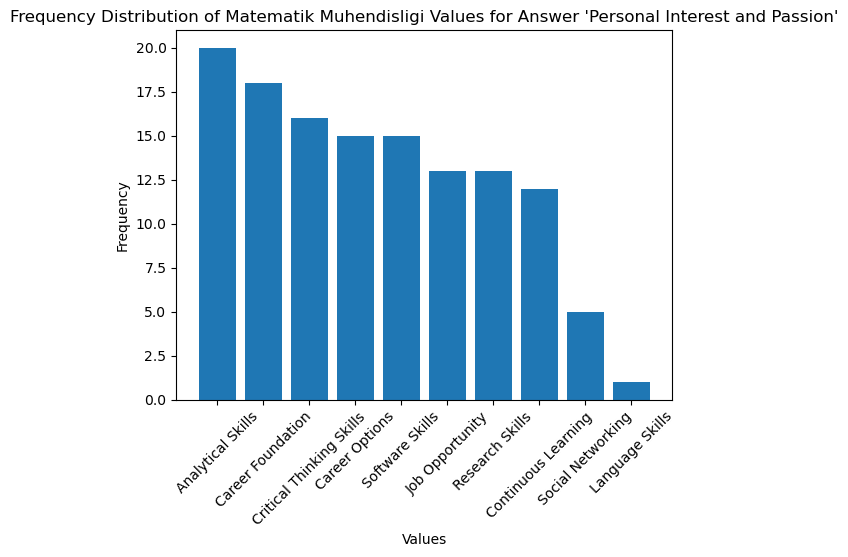

In [37]:
response_mapping = {
    'a': 'Job Opportunity',
    'b': 'Career Foundation',
    'c': 'Critical Thinking Skills',
    'd': 'Analytical Skills',
    'e': 'Language Skills',
    'f': 'Career Options',
    'g': 'Software Skills',
    'h': 'Research Skills',
    'i': 'Social Networking',
    'j': 'Continuous Learning',
    'k': 'Analytical Skills'
}



# Filter rows where 'Bolum secerken' is 'a'
filtered_df = df[df["Bolum secerken, matematik muhendisligini diger bolumlere gore on plana cikaran en onemli faktor nedir?"] == 'c']

# Flatten the arrays in 'Matematik Muhendisligi' column, strip whitespace, and remove empty strings
flattened_values = [item.strip() for sublist in filtered_df["Matematik Muhendisligi'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?"] for item in sublist if item.strip()]

# Map values to their corresponding descriptions
mapped_values = [response_mapping[val] for val in flattened_values]

# Count the frequency of each value
value_counts = pd.Series(mapped_values).value_counts()

# Plot the frequency distribution
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Matematik Muhendisligi Values for Answer 'Personal Interest and Passion'")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

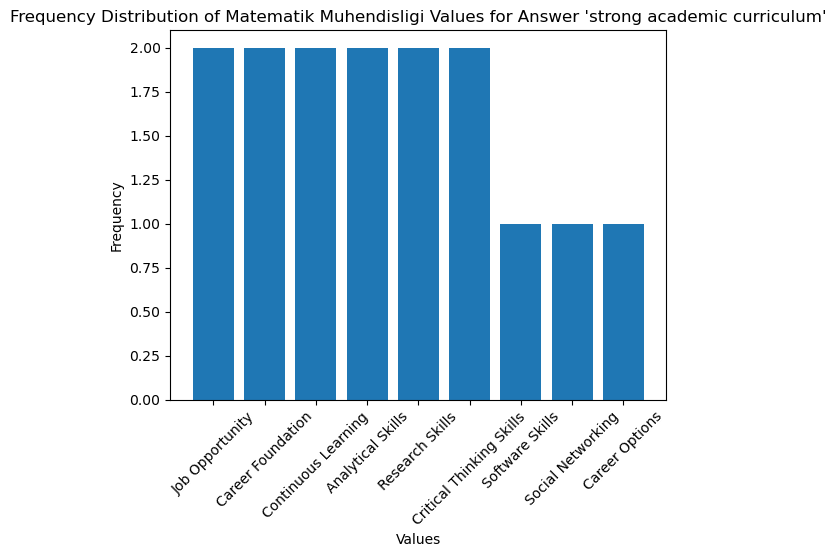

In [38]:
response_mapping = {
    'a': 'Job Opportunity',
    'b': 'Career Foundation',
    'c': 'Critical Thinking Skills',
    'd': 'Analytical Skills',
    'e': 'Language Skills',
    'f': 'Career Options',
    'g': 'Software Skills',
    'h': 'Research Skills',
    'i': 'Social Networking',
    'j': 'Continuous Learning',
    'k': 'Analytical Skills'
}



# Filter rows where 'Bolum secerken' is 'a'
filtered_df = df[df["Bolum secerken, matematik muhendisligini diger bolumlere gore on plana cikaran en onemli faktor nedir?"] == 'd']

# Flatten the arrays in 'Matematik Muhendisligi' column, strip whitespace, and remove empty strings
flattened_values = [item.strip() for sublist in filtered_df["Matematik Muhendisligi'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?"] for item in sublist if item.strip()]

# Map values to their corresponding descriptions
mapped_values = [response_mapping[val] for val in flattened_values]

# Count the frequency of each value
value_counts = pd.Series(mapped_values).value_counts()

# Plot the frequency distribution
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Matematik Muhendisligi Values for Answer 'strong academic curriculum'")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

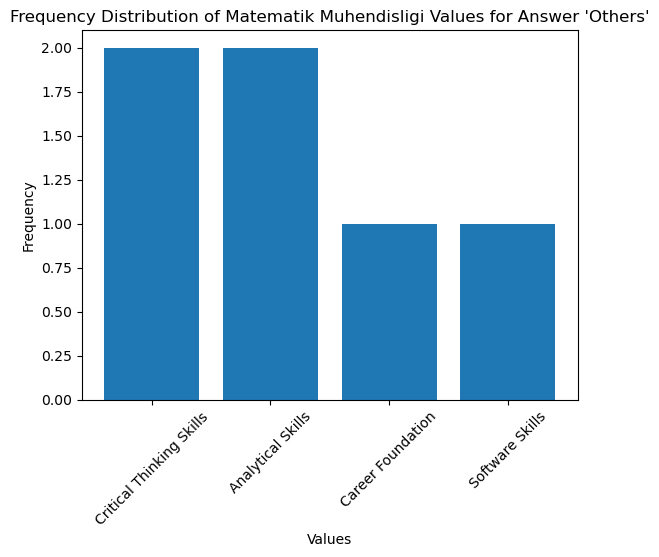

In [39]:
response_mapping = {
    'a': 'Job Opportunity',
    'b': 'Career Foundation',
    'c': 'Critical Thinking Skills',
    'd': 'Analytical Skills',
    'e': 'Language Skills',
    'f': 'Career Options',
    'g': 'Software Skills',
    'h': 'Research Skills',
    'i': 'Social Networking',
    'j': 'Continuous Learning',
    'k': 'Analytical Skills'
}



# Filter rows where 'Bolum secerken' is 'a'
filtered_df = df[df["Bolum secerken, matematik muhendisligini diger bolumlere gore on plana cikaran en onemli faktor nedir?"] == 'e']

# Flatten the arrays in 'Matematik Muhendisligi' column, strip whitespace, and remove empty strings
flattened_values = [item.strip() for sublist in filtered_df["Matematik Muhendisligi'nin kisisel ve profesyonel gelisiminize nasil katki saglayacagini hayal ediyorsunuz?"] for item in sublist if item.strip()]

# Map values to their corresponding descriptions
mapped_values = [response_mapping[val] for val in flattened_values]

# Count the frequency of each value
value_counts = pd.Series(mapped_values).value_counts()

# Plot the frequency distribution
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Matematik Muhendisligi Values for Answer 'Others'")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Istanbul DIsi Ogrenciler

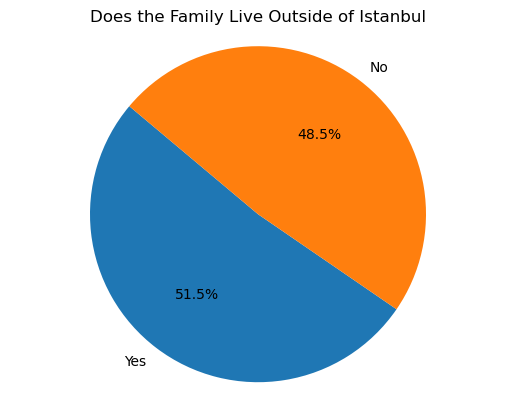

In [40]:
response_mapping = {'a': 'Yes', 'b': 'No'}
df["Aileniz istanbul disinda mi yasiyor?"] = df["Aileniz istanbul disinda mi yasiyor?"].map(response_mapping)

# Count the frequency of each response
response_counts = df["Aileniz istanbul disinda mi yasiyor?"].value_counts()

# Plot the pie chart
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Does the Family Live Outside of Istanbul")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Distrubution of Participating or Planning to Participate in Research Projects or Internships During University Years

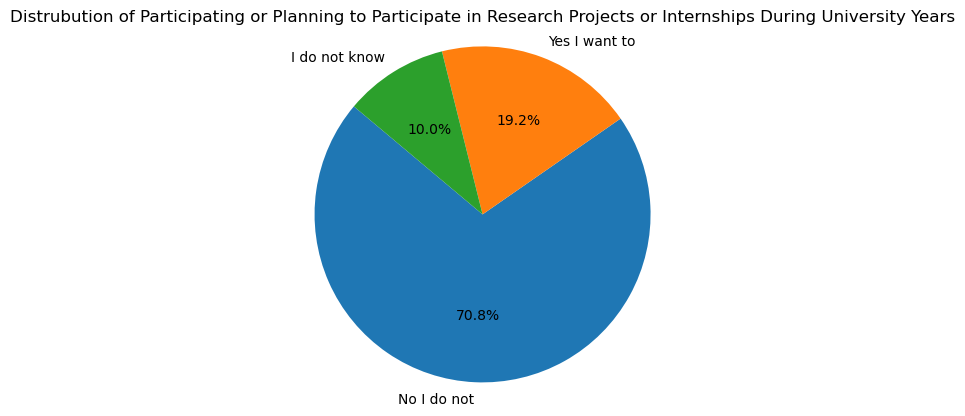

In [41]:

response_mapping = {'a': 'I do not know', 'b': 'No I do not', 'c': 'Yes I want to'}
df["universite surecinizde arastırma projelerine veya stajlara katiliyor musunuz veya katilmayi düşünüyor musunuz?"] = df["universite surecinizde arastırma projelerine veya stajlara katiliyor musunuz veya katilmayi düşünüyor musunuz?"].map(response_mapping)

# Count the frequency of each response
response_counts = df["universite surecinizde arastırma projelerine veya stajlara katiliyor musunuz veya katilmayi düşünüyor musunuz?"].value_counts()

# Plot the pie chart
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distrubution of Participating or Planning to Participate in Research Projects or Internships During University Years")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Motivation of Students that do or do not want to Participate or Plan to Participate in Research Projects or Internships During University Years

In [42]:


# Split the values into arrays
df["Matematik Mühendisligi bölümüne basvurmanizi motive eden nedir?(Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin)"] = df["Matematik Mühendisligi bölümüne basvurmanizi motive eden nedir?(Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin)"].str.split(',')


In [43]:
df["Matematik Mühendisligi bölümüne basvurmanizi motive eden nedir?(Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin)"]

0                  [a]
1                  [b]
2                  [d]
3                  [d]
4      [a,  c,  b,  e]
            ...       
125                [d]
126                [a]
127                [d]
128                [d]
129                [e]
Name: Matematik Mühendisligi bölümüne basvurmanizi motive eden nedir?(Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin), Length: 130, dtype: object

In [44]:
df['Matematik Mühendisligi bölümüne basvurmanizi motive eden nedir?(Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin)']

0                  [a]
1                  [b]
2                  [d]
3                  [d]
4      [a,  c,  b,  e]
            ...       
125                [d]
126                [a]
127                [d]
128                [d]
129                [e]
Name: Matematik Mühendisligi bölümüne basvurmanizi motive eden nedir?(Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin), Length: 130, dtype: object

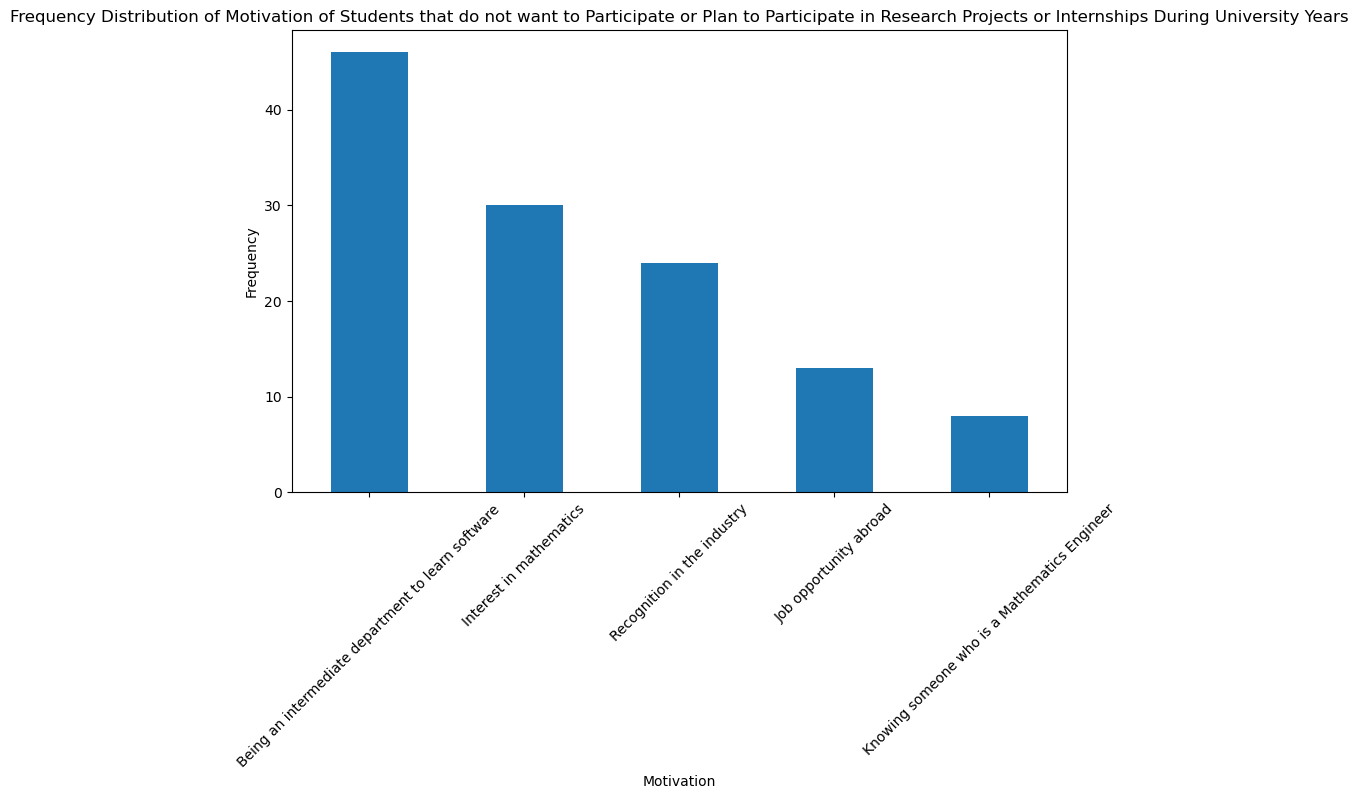

In [47]:
response_mapping = {
    'a': 'Job opportunity abroad',
    'b': 'Recognition in the industry',
    'c': 'Interest in mathematics',
    'd': 'Being an intermediate department to learn software',
    'e': 'Knowing someone who is a Mathematics Engineer'
}

# Filter rows where 'universite surecinizde arastırma projelerine veya stajlara katiliyor musunuz veya katilmayi düşünüyor musunuz?' is 'No I do not'
filtered_df = df[df["universite surecinizde arastırma projelerine veya stajlara katiliyor musunuz veya katilmayi düşünüyor musunuz?"] == 'No I do not']

# Flatten the arrays in 'Matematik Mühendisligi' column, strip whitespace, and remove empty strings
flattened_values = [item.strip() for sublist in filtered_df["Matematik Mühendisligi bölümüne basvurmanizi motive eden nedir?(Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin)"] for item in sublist if item.strip()]

# Map values to their corresponding descriptions
mapped_values = [response_mapping[val] for val in flattened_values]

# Count the frequency of each value
value_counts = pd.Series(mapped_values).value_counts()

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel("Motivation")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Motivation of Students that do not want to Participate or Plan to Participate in Research Projects or Internships During University Years")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

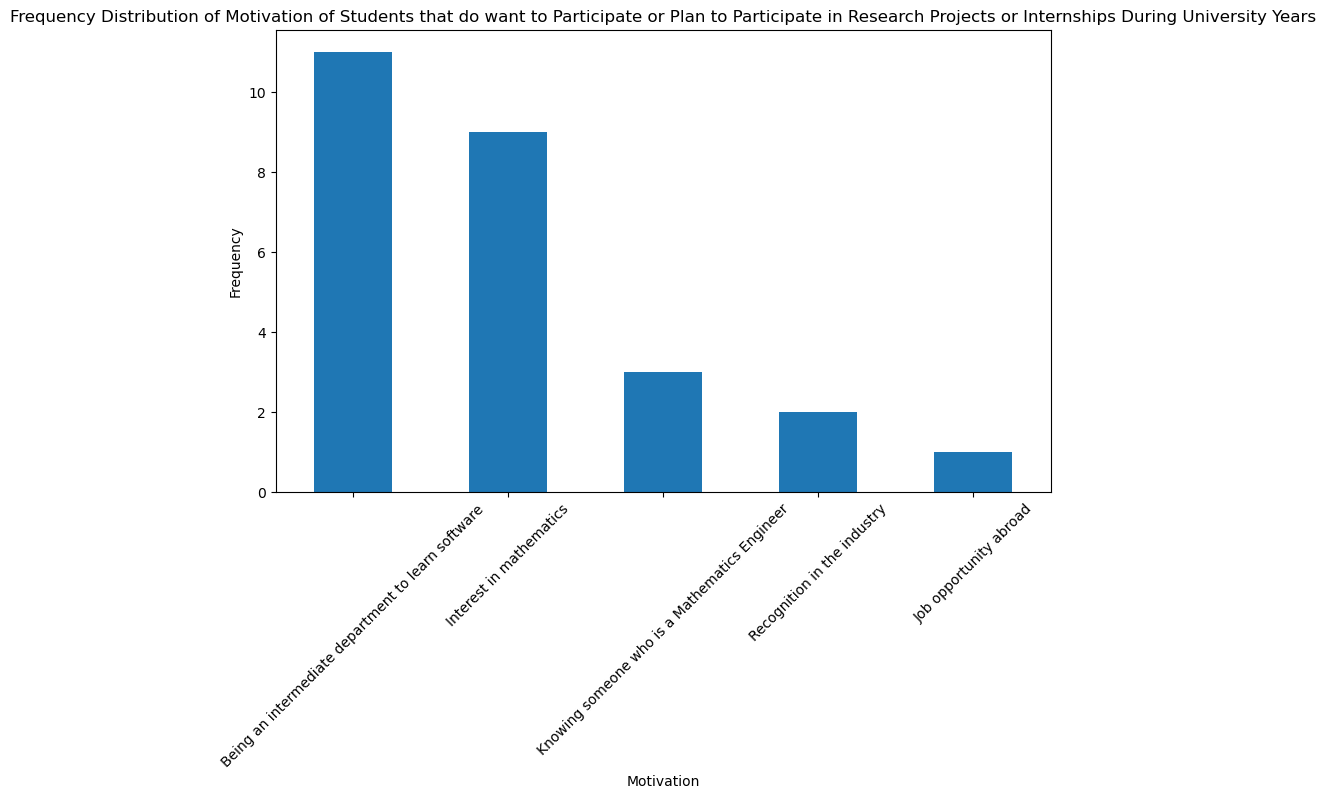

In [48]:
response_mapping = {
    'a': 'Job opportunity abroad',
    'b': 'Recognition in the industry',
    'c': 'Interest in mathematics',
    'd': 'Being an intermediate department to learn software',
    'e': 'Knowing someone who is a Mathematics Engineer'
}

# Filter rows where 'universite surecinizde arastırma projelerine veya stajlara katiliyor musunuz veya katilmayi düşünüyor musunuz?' is 'No I do not'
filtered_df = df[df["universite surecinizde arastırma projelerine veya stajlara katiliyor musunuz veya katilmayi düşünüyor musunuz?"] == 'Yes I want to']

# Flatten the arrays in 'Matematik Mühendisligi' column, strip whitespace, and remove empty strings
flattened_values = [item.strip() for sublist in filtered_df["Matematik Mühendisligi bölümüne basvurmanizi motive eden nedir?(Diger secenegini secmeniz durumunda lutfen kisaca cevabinizi yazin)"] for item in sublist if item.strip()]

# Map values to their corresponding descriptions
mapped_values = [response_mapping[val] for val in flattened_values]

# Count the frequency of each value
value_counts = pd.Series(mapped_values).value_counts()

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel("Motivation")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Motivation of Students that do want to Participate or Plan to Participate in Research Projects or Internships During University Years")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()